<div style="text-align:center; font-size: 48px;">Titanic Competition Kaggle</div>
<div style="text-align:center; font-size: 36px;">Exploration</div>

# 1. Load libraries


In [ ]:
#library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

sns.set_theme(style='darkgrid')
sns.set_palette('dark')

# 2. Load data


In [6]:
# Load the training dataset
df = pd.read_csv("../data/raw/train.csv")

# 3. Overview


**🧾 Titanic Dataset: Variable Definitions**

| **Variable** | **Definition** | **Key / Notes** |
|--------------|----------------|-----------------|
| `survival`   | Survival status | `0 = No`, `1 = Yes` |
| `pclass`     | Ticket class (proxy for socio-economic status) | `1 = Upper`, `2 = Middle`, `3 = Lower` |
| `sex`        | Sex | `male` / `female` |
| `age`        | Age in years | Fractional if < 1; estimated ages shown as `xx.5` |
| `sibsp`      | Number of siblings/spouses aboard | Siblings = brother, sister, stepbrother, stepsister; Spouses = husband, wife (mistresses/fiancés ignored) |
| `parch`      | Number of parents/children aboard | Parents = mother, father; Children = son, daughter, stepchildren; nannies not counted |
| `ticket`     | Ticket number | May contain letters or numbers |
| `fare`       | Passenger fare | Numeric (in pounds) |
| `cabin`      | Cabin number | Often missing; may contain multiple values |
| `embarked`   | Port of embarkation | `C = Cherbourg`, `Q = Queenstown`, `S = Southampton` |

In [7]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [8]:
print(df.shape)

(891, 12)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#null values
tempdf = df.isnull().sum()[df.isnull().sum() > 0]
pd.concat(
    [tempdf,
    (tempdf / df.shape[0] * 100).round(2)],
    axis=1,
).rename(columns={0: "Null Count", 1: "Null Percentage"})

,Null Count,Null Percentage
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


# 4. Univariate analysis (e.g., countplot of Sex, Pclass)


### Survived

In [12]:
pd.concat(
    [df['Survived'].value_counts().sort_index().round(2),
    df['Survived'].value_counts(normalize=True).sort_index().round(2)],
    axis=1,
    keys=['Count', 'Proportion']
)


,Count,Proportion
Survived,,
0,549,0.62
1,342,0.38


### Pclass


In [13]:
pd.concat(
    [df['Pclass'].value_counts().sort_index().round(2),
    df['Pclass'].value_counts(normalize=True).sort_index().round(2)],
    axis=1,
    keys=['Count', 'Proportion']
)

,Count,Proportion
Pclass,,
1,216,0.24
2,184,0.21
3,491,0.55


### Sex


In [14]:
pd.concat(
    [df['Sex'].value_counts().sort_index().round(2),
    df['Sex'].value_counts(normalize=True).sort_index().round(2)],
    axis=1,
    keys=['Count', 'Proportion']
)

,Count,Proportion
Sex,,
female,314,0.35
male,577,0.65


### Age

In [15]:
df['Age'].describe().round(2)

count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64

<Axes: >

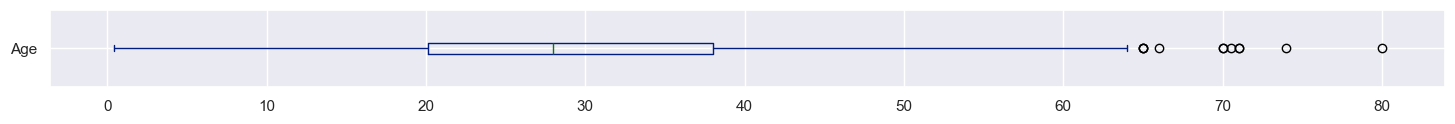

In [16]:
df['Age'].plot(kind='box', figsize=(18, 1), vert=False)

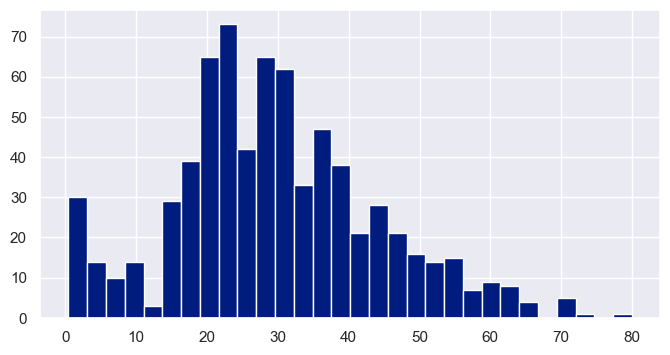

In [17]:
df['Age'].hist(bins=30, figsize=(8, 4))
plt.show()

### SibSp & Parch

In [18]:
df[['SibSp', 'Parch']].describe().round(2)

,SibSp,Parch
count,891.00,891.00
mean,0.52,0.38
std,1.10,0.81
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,1.00,0.00
max,8.00,6.00


<Axes: title={'center': 'SibSp & Parch Counts'}, xlabel='SibSp,Parch'>

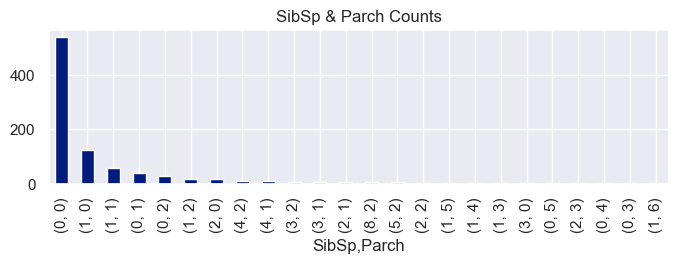

In [19]:
df[['SibSp', 'Parch']].value_counts().plot(kind='bar', figsize=(8, 2),title='SibSp & Parch Counts')

<Axes: ylabel='Frequency'>

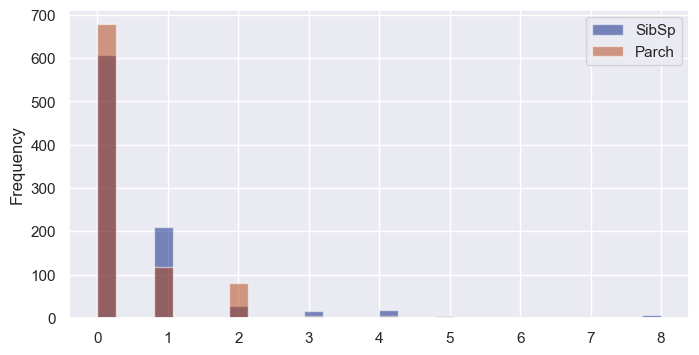

In [20]:
df[['SibSp', 'Parch']].plot(kind='hist', bins=30, figsize=(8, 4), alpha=0.5)

### Ticket

In [21]:
df['Ticket'].value_counts().head(10)

Ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: count, dtype: int64

### Fare

In [22]:
df['Fare'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).round(2)

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
90%       77.96
95%      112.08
99%      249.01
max      512.33
Name: Fare, dtype: float64

<Axes: >

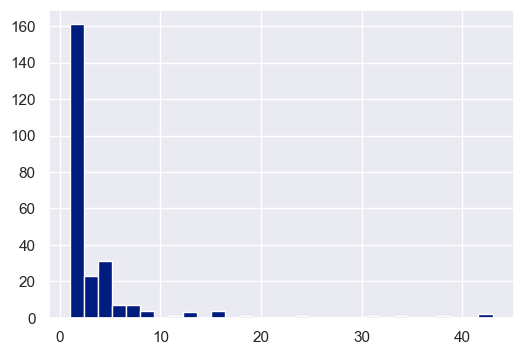

In [23]:
df['Fare'].value_counts().sort_index(ascending=True).hist(bins=30, figsize=(6, 4))

<Axes: xlabel='Fare'>

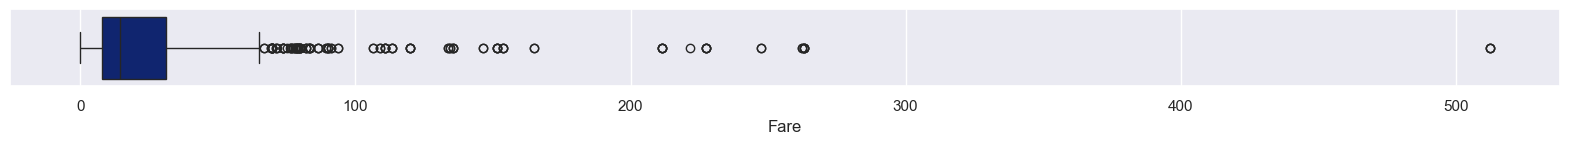

In [24]:
plt.figure(figsize=(20, 1))    
sns.boxplot(
    df['Fare'], 
    orient='h',
)

I'll Check in depth in multivariate

### Embarked

In [25]:
pd.concat(
    [df['Embarked'].value_counts().sort_index().round(2),
    df['Embarked'].value_counts(normalize=True).sort_index().round(2)*100],
    axis=1,
    keys=['Count', 'Proportion']
)

,Count,Proportion
Embarked,,
C,168,19.0
Q,77,9.0
S,644,72.0


In [26]:
df[['Embarked' , 'Pclass']].value_counts().sort_index().reset_index

<bound method Series.reset_index of Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: count, dtype: int64>

In [27]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# 5. multivariate analysis with target


In [28]:
# Transform 'Sex' and 'Embarked' columns to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


<Axes: >

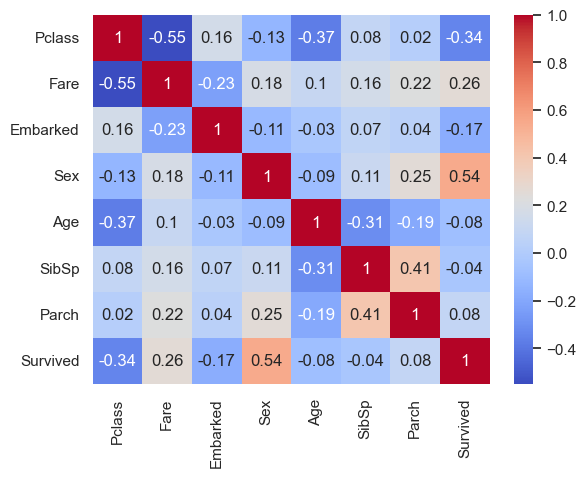

In [29]:
numcol = ['Pclass', 'Fare', 'Embarked', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']


sns.heatmap(
    df[numcol].corr().round(2),
    annot=True,
    cmap='coolwarm'
    )

/var/folders/2n/xc_5x6ys00q7kj5lcfn2s10r0000gn/T/ipykernel_16784/1572340232.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='Survived', ax=axes[i], fill=True, alpha=0.3, common_norm=True)


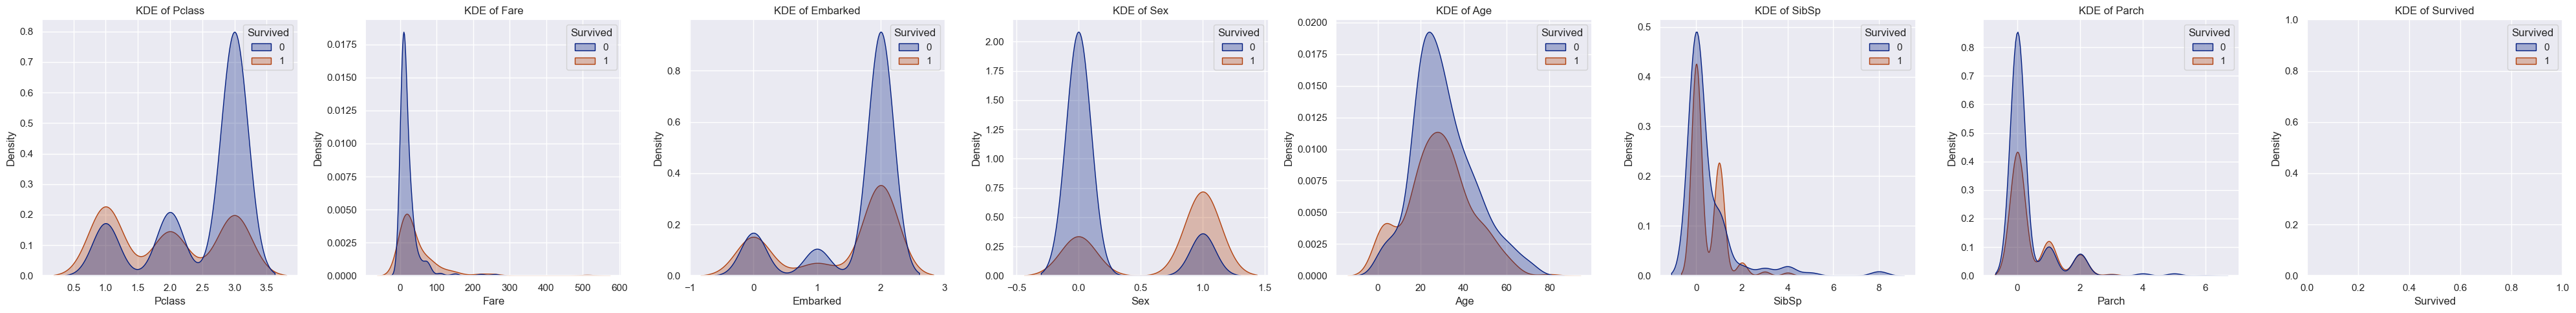

In [30]:
fig, axes = plt.subplots(1, len(numcol), figsize=(5 * len(numcol), 5))

for i, col in enumerate(numcol):
    sns.kdeplot(data=df, x=col, hue='Survived', ax=axes[i], fill=True, alpha=0.3, common_norm=True)
    axes[i].set_title(f'KDE of {col}')

plt.tight_layout()
plt.show()

#### Pclass - survive

In [31]:
print('count:')
print(pd.crosstab(df['Pclass'], df['Survived'], normalize=False).round(2))

print("\n\nsurvival rate by sex")
print(pd.crosstab(df['Pclass'], df['Survived'], normalize='index').round(2))

print("\n\nsurvival rate by sex column")
print(pd.crosstab(df['Pclass'], df['Survived'], normalize='columns').round(2))

count:
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


survival rate by sex
Survived     0     1
Pclass              
1         0.37  0.63
2         0.53  0.47
3         0.76  0.24


survival rate by sex column
Survived     0     1
Pclass              
1         0.15  0.40
2         0.18  0.25
3         0.68  0.35


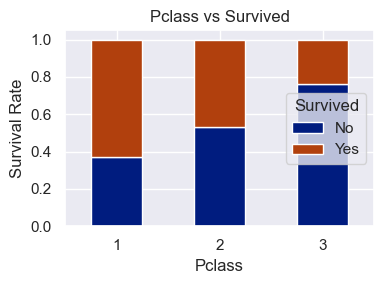

In [32]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index').round(2).plot(
    kind='bar',
    stacked=True,
    title='Pclass vs Survived',
    xlabel='Pclass',
    ylabel='Survival Rate',
    rot=0,
    figsize=(4, 3)
)
plt.legend(title='Survived', loc='right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

#### Sex - survived


In [33]:
print('count:')
print(pd.crosstab(df['Sex'], df['Survived'], normalize=False).round(2))

print("\n\nsurvival rate by sex")
print(pd.crosstab(df['Sex'], df['Survived'], normalize='index').round(2))

print("\n\nsurvival rate by sex column")
print(pd.crosstab(df['Sex'], df['Survived'], normalize='columns').round(2))

count:
Survived    0    1
Sex               
0         468  109
1          81  233


survival rate by sex
Survived     0     1
Sex                 
0         0.81  0.19
1         0.26  0.74


survival rate by sex column
Survived     0     1
Sex                 
0         0.85  0.32
1         0.15  0.68


#### Age - survived

In [34]:
df['Age'].groupby(df['Survived']).describe().round(2).T

Survived,0,1
count,424.00,290.00
mean,30.63,28.34
std,14.17,14.95
min,1.00,0.42
25%,21.00,19.00
50%,28.00,28.00
75%,39.00,36.00
max,74.00,80.00


Filling missing values in 'Age' column with Median, as  it is equal across both classes (28.0), so no bias is introduced toward survival.


In [35]:
df['Age'] = df['Age'].fillna(df['Age'].median())

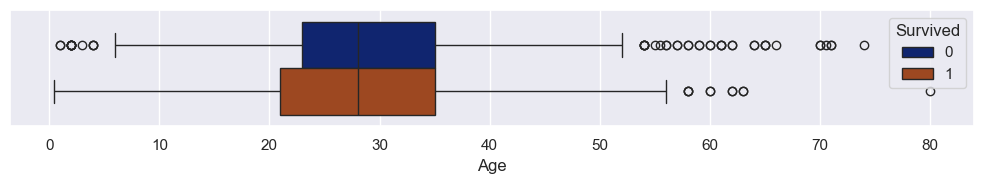

In [36]:
plt.figure(figsize=(10, 2))
sns.boxplot(
    data=df,
    x='Age',
    hue='Survived',
    orient='h',
)

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

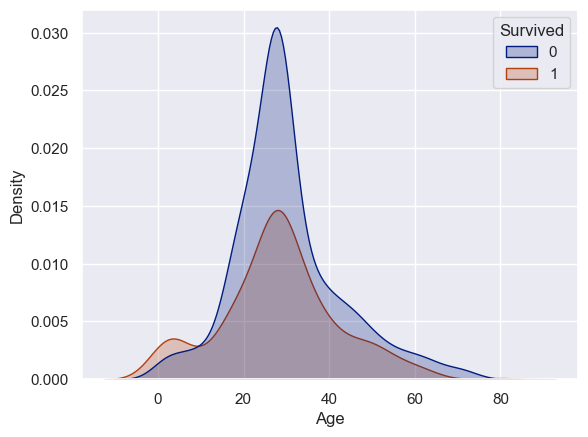

In [37]:
sns.kdeplot(
    data=df,
    x='Age',
    hue='Survived',
    fill=True,
)

#### Family - survived


In [38]:
df['isfamilyonboard'] = False
df.loc[(df['SibSp'] > 0) | (df['Parch'] > 0), 'isfamilyonboard'] = True

(pd.crosstab(df['isfamilyonboard'], df['Survived'], normalize='columns')*100).round()

Survived,0,1
isfamilyonboard,,
False,68.0,48.0
True,32.0,52.0


#### Ticket - Survived

<Axes: xlabel='Survived', ylabel='TicketGroupSize'>

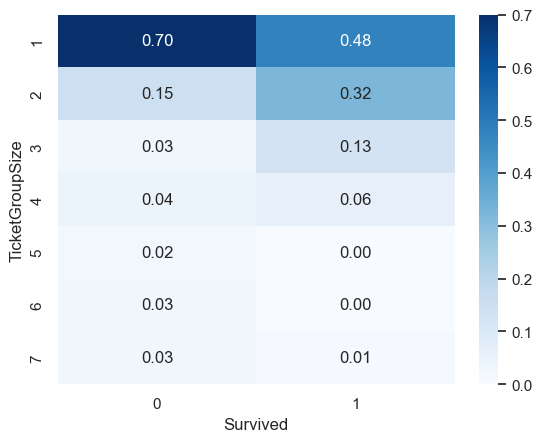

In [39]:
df['TicketGroupSize'] = df.groupby('Ticket')['Ticket'].transform('count')

sns.heatmap(pd.crosstab(df['TicketGroupSize'], df['Survived'], normalize='columns').round(2), annot=True, fmt='.2f', cmap='Blues')

In [40]:
df[['TicketGroupSize','Survived']].corr().round(2)

,TicketGroupSize,Survived
TicketGroupSize,1.00,0.04
Survived,0.04,1.00


#### Fare - Pclass

In [41]:
df['Fare'].groupby(df['Pclass']).describe().round(2).T

Pclass,1,2,3
count,216.00,184.00,491.00
mean,84.15,20.66,13.68
std,78.38,13.42,11.78
min,0.00,0.00,0.00
25%,30.92,13.00,7.75
50%,60.29,14.25,8.05
75%,93.50,26.00,15.50
max,512.33,73.50,69.55


<Axes: xlabel='Fare'>

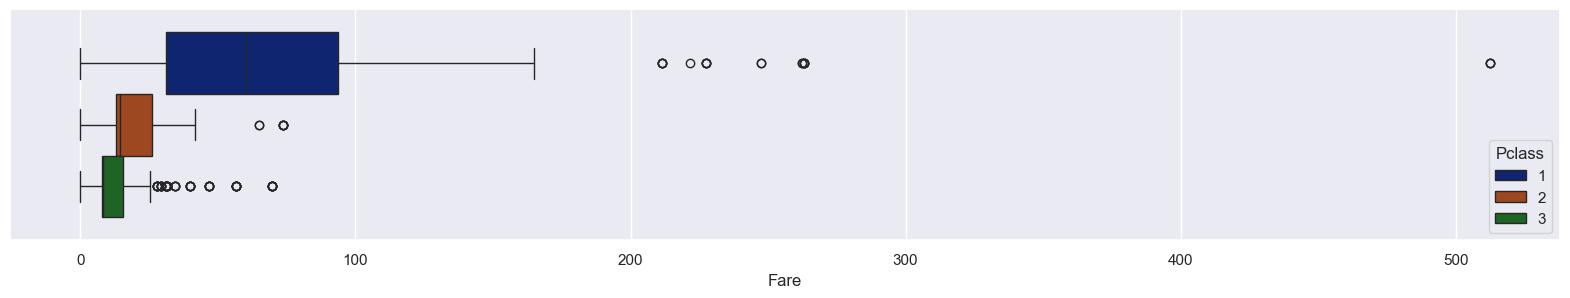

In [42]:
plt.figure(figsize=(20, 3))
sns.boxplot(
    data=df,
    x='Fare',
    hue='Pclass',
    palette='dark',
)

In [43]:
df[['Pclass', 'Fare']].corr().round(2)

,Pclass,Fare
Pclass,1.00,-0.55
Fare,-0.55,1.00


In [47]:
fare_bounds = df.groupby('Pclass')['Fare'].agg(
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)

fare_bounds['IQR'] = fare_bounds['Q3'] - fare_bounds['Q1']
fare_bounds['Upper_Bound'] = fare_bounds['Q3'] + 1.5 * fare_bounds['IQR']
fare_bounds['Lower_Bound'] = (fare_bounds['Q1'] - 1.5 * fare_bounds['IQR']).clip(lower=0)

fare_bounds.round(2)

,Q1,Q3,IQR,Upper_Bound,Lower_Bound
Pclass,,,,,
1,30.92,93.5,62.58,187.36,0.0
2,13.00,26.0,13.00,45.50,0.0
3,7.75,15.5,7.75,27.12,0.0


In [51]:
# Filter out outliers to double check
tempdf = df[df['Fare'] >= fare_bounds['Upper_Bound'].max()].groupby(by='Ticket')['Fare'].agg(['min', 'max', 'mean', 'count'])

(tempdf['max'] - tempdf['min']).sum()

0.0

In [52]:
tempdf.sort_values(by='max', ascending=False).reset_index().merge(df[['Ticket', 'Pclass']], on='Ticket', how='left')

,Ticket,min,max,mean,count,Pclass
0,PC 17755,512.3292,512.3292,512.3292,3,1
1,PC 17755,512.3292,512.3292,512.3292,3,1
2,PC 17755,512.3292,512.3292,512.3292,3,1
3,19950,263.0000,263.0000,263.0000,4,1
4,19950,263.0000,263.0000,263.0000,4,1
5,19950,263.0000,263.0000,263.0000,4,1
6,19950,263.0000,263.0000,263.0000,4,1
7,PC 17608,262.3750,262.3750,262.3750,2,1
8,PC 17608,262.3750,262.3750,262.3750,2,1
9,PC 17558,247.5208,247.5208,247.5208,2,1


In [ ]:
#they seem correct, just cap the max fare previous price, So capping them based on Pclass

for i in range(1, 4):
    df.loc[
        (df['Pclass'] == i) & (df['Fare'] > fare_bounds.loc[i, 'Upper_Bound']),
        'Fare'
    ] = fare_bounds.loc[i, 'Upper_Bound']

#### Fare - Survived

<Axes: xlabel='Fare', ylabel='Density'>

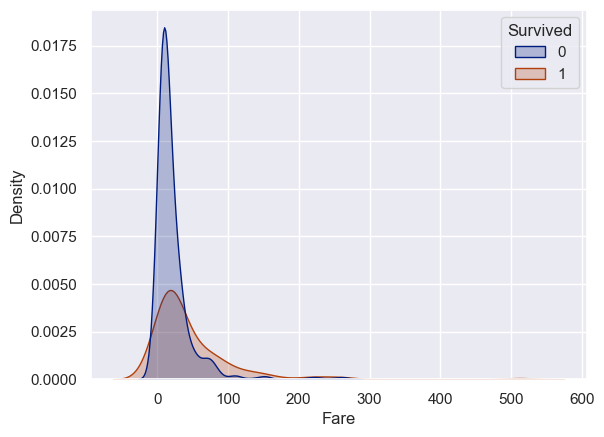

In [55]:
sns.kdeplot(
    data=df,
    x='Fare',
    hue='Survived',
    fill=True,
    common_norm=True
)

In [56]:
df[['Fare', 'Pclass', 'Survived']].corr().round(2)

,Fare,Pclass,Survived
Fare,1.00,-0.55,0.26
Pclass,-0.55,1.00,-0.34
Survived,0.26,-0.34,1.00


Same effect of Fare and Pclass

#### Embarked - Survived

In [ ]:
print('count')
print(pd.crosstab(df['Embarked'], df['Survived'], normalize=False).round(2))

print("\n\nsurvival rate by embarked")
print(pd.crosstab(df['Embarked'], df['Survived'], normalize='index').round(2))

print("\n\nsurvival rate by embarked column")
print(pd.crosstab(df['Embarked'], df['Survived'], normalize='columns').round(2))

count
Survived    0    1
Embarked          
0.0        75   93
1.0        47   30
2.0       427  217


survival rate by embarked
Survived     0     1
Embarked            
0.0       0.45  0.55
1.0       0.61  0.39
2.0       0.66  0.34


survival rate by embarked column
Survived     0     1
Embarked            
0.0       0.14  0.27
1.0       0.09  0.09
2.0       0.78  0.64


Seems to have no effect on survival rate, but let's check the fare distribution by embarked

<Axes: xlabel='Fare'>

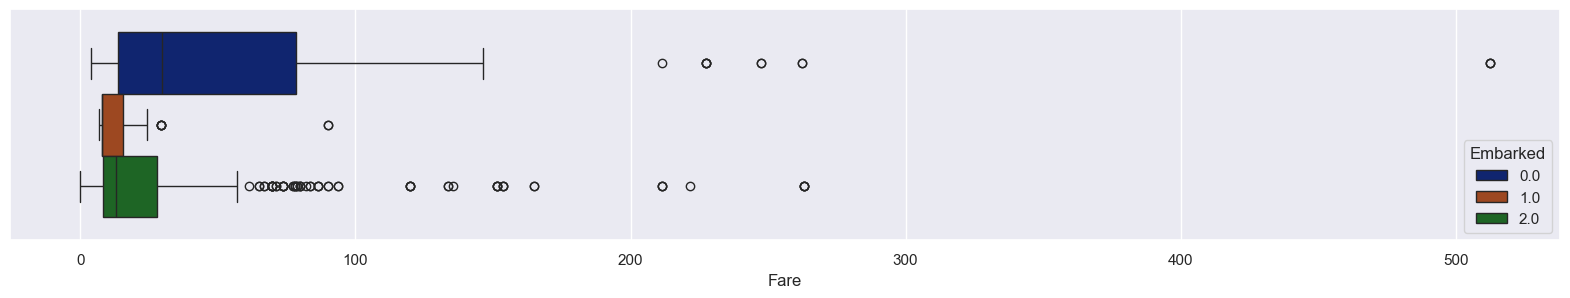

In [66]:
plt.figure(figsize=(20, 3))
sns.boxplot(
    data=df,
    x='Fare',
    hue='Embarked',
    palette='dark',
)


# 6. Initial observations & hypotheses

## 🛠 Missing Value Strategy

### `Age`

* \~20% missing; too many to drop.
* Impute with **median (28.0)** — it's consistent across survival classes, so no bias is introduced.
* Some outliers exist, but they appear reasonable. So to address it, assign them into a new feature `AgeGroup`


### `Cabin`

* Majority missing.
* Low information value → **Drop the column.**


### `Embarked`

* Very few missing values.
* Random pattern, no clear link with survival.
* Drop missing rows or impute with mode (`S`)


---

## 📊 Variable Insights

### `Survived`
* Imbalanced distribution, more data on **Class 0**.


### `Pclass`

* Imbalanced distribution, more data on **Class 3**.
* Strong correlation with **Fare** and also **Survival**.
* seems that Fare and Class are pointing to a similar concept.

### `Sex`

* Strong survival predictor.
* **Female survival rate ≈ 68%** — significant difference from males.

### `SibSp` and `Parch`

* Being with family may influence survival.
* Create a binary feature may helps to capture effect of having relatives on board.

### `Ticket`

* Passengers with the same ticket may belong to a group/family.
* Create group size feature

### `Fare`

* Outliers exist no need to drop, Cap the outliers based on Pclass

### `Embarked`
* seems random and have no effect on survival rate

---